In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# Load and describe data
churn = pd.read_csv('df2_encoded.csv')
df = pd.DataFrame(churn)
print(df.describe(include='all'))
#df.info()



              stag        event       gender          age     industry  \
count  1129.000000  1129.000000  1129.000000  1129.000000  1129.000000   
mean     36.627526     0.505757     0.244464    31.066965     0.232950   
std      34.096597     0.500188     0.429959     6.996147     0.422898   
min       0.394251     0.000000     0.000000    18.000000     0.000000   
25%      11.728953     0.000000     0.000000    26.000000     0.000000   
50%      24.344969     1.000000     0.000000    30.000000     0.000000   
75%      51.318275     1.000000     0.000000    36.000000     0.000000   
max     179.449692     1.000000     1.000000    58.000000     1.000000   

        profession      traffic        coach  head_gender     greywage  \
count  1129.000000  1129.000000  1129.000000  1129.000000  1129.000000   
mean      0.108946     0.406554     0.395040     0.517272     0.887511   
std       0.311709     0.491408     0.489076     0.499923     0.316107   
min       0.000000     0.000000     0

In [11]:
# Define target and features
target = df['event']
features = df.drop('event', axis=1)

# Function to add interaction terms efficiently
def add_interaction_terms(df, interaction_pairs):
    interaction_df = pd.DataFrame(index=df.index)
    for (col1, col2) in interaction_pairs:
        new_col_name = f"{col1}_{col2}"
        interaction_df[new_col_name] = df[col1] * df[col2]
    return pd.concat([df, interaction_df], axis=1)

# Create interaction pairs
interaction_pairs = list(combinations(features.columns, 2))

# Add interaction terms to the dataset
features_with_interactions = add_interaction_terms(features.copy(), interaction_pairs)


/var/folders/py/tv510k412ng5gn088wknlmfr0000gp/T/ipykernel_93356/2429442778.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[new_col_name] = df[col1] * df[col2]
/var/folders/py/tv510k412ng5gn088wknlmfr0000gp/T/ipykernel_93356/2429442778.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[new_col_name] = df[col1] * df[col2]
/var/folders/py/tv510k412ng5gn088wknlmfr0000gp/T/ipykernel_93356/2429442778.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Confusion Matrix (Training Data):
[[306 144]
 [146 307]]


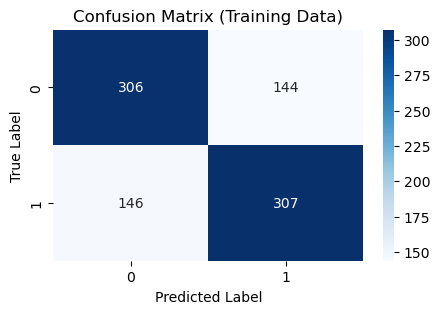

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       450
           1       0.68      0.68      0.68       453

    accuracy                           0.68       903
   macro avg       0.68      0.68      0.68       903
weighted avg       0.68      0.68      0.68       903



In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_with_interactions, target, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', solver='saga',C=1 )
logreg.fit(X_train_scaled, y_train)

# Predictions and Evaluation
train_predictions = logreg.predict(X_train_scaled)
test_predictions = logreg.predict(X_test_scaled)

# Confusion Matrix and Classification Report for Training Data
conf_matrix_train = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix (Training Data):")
print(conf_matrix_train)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Data)')
plt.show()

print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))

Accuracy on Training Data: 0.6788482834994463
Confusion Matrix (Testing Data):
[[68 40]
 [45 73]]


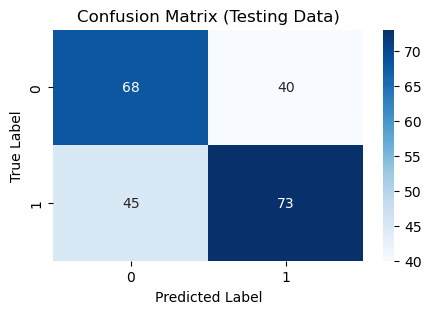

In [25]:
# Accuracy Scores for Training Data
accuracy_score_train = logreg.score(X_train_scaled, y_train)
print(f"Accuracy on Training Data: {accuracy_score_train}")

# Confusion Matrix and Classification Report for Testing Data
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix (Testing Data):")
print(conf_matrix_test)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Testing Data)')
plt.show()


In [26]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, test_predictions))

# Accuracy Scores for Testing Data
accuracy_score_test = logreg.score(X_test_scaled, y_test)
print(f"Accuracy on Testing Data: {accuracy_score_test}")


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       108
           1       0.65      0.62      0.63       118

    accuracy                           0.62       226
   macro avg       0.62      0.62      0.62       226
weighted avg       0.62      0.62      0.62       226

Accuracy on Testing Data: 0.6238938053097345


In [27]:
# Hyperparameter tuning using GridSearchCV with interaction terms
param_grid = {
    'C': [1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=6000, random_state=42), param_grid, cv=3, scoring=['accuracy', 'recall', 'precision', 'f1'], refit='recall')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [28]:
# Fit and evaluate the best model
best_model.fit(X_train_scaled, y_train)
print(f"Train Accuracy with Interaction Terms: {best_model.score(X_train_scaled, y_train):.3f}")
print(f"Test Accuracy with Interaction Terms: {best_model.score(X_test_scaled, y_test):.3f}")



Train Accuracy with Interaction Terms: 0.679
Test Accuracy with Interaction Terms: 0.624


In [18]:
# Create a coefficient table from the best model
def get_coefficient_table(model, feature_names):
    coefficients = model.coef_.flatten()
    coeff_df = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients})
    return coeff_df

coeff_table = get_coefficient_table(best_model, X_train.columns)
#print(coeff_table)
